In [1]:
!nvidia-smi

'nvidia-smi' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
# General imports for data handling
import pandas as pd
import numpy as np

# Imports for plotting and visualization
import matplotlib.pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns

# Imports for preprocessing and machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

# Imports for building and training neural network models
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, TensorBoard
from tensorflow.keras.regularizers import l2

In [3]:
# Check if GPU is available
print('GPU is available') if tf.test.gpu_device_name() else print('GPU is not available')

GPU is not available


In [2]:
# Data preprocessing
data = pd.read_csv("Datasets/EditDatasets/split_1.csv")
data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,splt_piat_ms,application_name,application_category_name,application_is_guessed,application_confidence,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type
0,23000000,0,646a65ced10c2c5ae194c2b3013f3fc89e01bc6e9a2940...,22654563b2178423bb1fe89d05d9585017a4795d451e09...,34:f8:e7,52464,421d6cbea6ce8cd1375c0d0d62613bf3970683d96ea3f6...,00aa39755aa294dd62d4a1ca9cdef3268c7b3306b4c3ab...,e8:b7:48,59044,...,"[0, 1013, 2002, 4002, 8003, -1, -1, -1, -1, -1...",Unknown,Unspecified,0,0,NaN,NaN,NaN,NaN,NaN
1,23000001,0,a04f261f17d925c642179c28cb84803dd18d090cc97a5b...,1ec055100c7879be5d1cc84bdd7ebd164c51c0d4234998...,60:73:5c,31396,76070ff9ba659c6e8c3c62b6bbafe97ae6ab2e6d6f6b2c...,00aa39755aa294dd62d4a1ca9cdef3268c7b3306b4c3ab...,e8:b7:48,6654,...,"[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1...",BitTorrent,Download,0,3,NaN,NaN,NaN,NaN,NaN
2,23000002,0,a5e06857721463d6c248ef405378baff1fa58ecc844e92...,1ec055100c7879be5d1cc84bdd7ebd164c51c0d4234998...,60:73:5c,61021,3aac346aeba7c94f2fc43e6d25ed08c6ce13fed06aef9b...,00aa39755aa294dd62d4a1ca9cdef3268c7b3306b4c3ab...,e8:b7:48,58931,...,"[0, 60, 0, 8, 51, 8, 65, 6, 58, 1, 3, 1, 0, 54...",BitTorrent,Download,1,3,NaN,NaN,NaN,NaN,NaN
3,23000003,0,d4037fbdb40b21a0302983127ebf5aeb530de5e266b5d2...,9de0868a0081fedace3ef938c59b9ba0a968d47b986434...,a4:4b:d5,16304,1b6e6f81ddd59a857abe7e8cce15556b97dd021f41901c...,b2a5e7e6324edb46914bed0a54d5ac4817822a5d5249d4...,00:25:b4,53,...,"[0, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,...",DNS.TikTok,SocialNetwork,0,4,tnc16-platform-useast2a.tiktokv.com,NaN,NaN,NaN,NaN
4,23000004,0,3a39e5655e4040af4e247dd3903754bcb8d22dab8c770b...,6b6d41f43b5e11df9e100d10c15fa6335c91c6b6e4560c...,00:1c:7f,37930,a5aaace3f552acde186adb6ead3149e6f0eb6723297562...,00aa39755aa294dd62d4a1ca9cdef3268c7b3306b4c3ab...,e8:b7:48,53,...,"[0, 1, 166, 0, 166, -1, -1, -1, -1, -1, -1, -1...",DNS,Network,1,1,NaN,NaN,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 89 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10000 non-null  int64  
 1   expiration_id                 10000 non-null  int64  
 2   src_ip                        10000 non-null  object 
 3   src_mac                       10000 non-null  object 
 4   src_oui                       10000 non-null  object 
 5   src_port                      10000 non-null  int64  
 6   dst_ip                        10000 non-null  object 
 7   dst_mac                       10000 non-null  object 
 8   dst_oui                       10000 non-null  object 
 9   dst_port                      10000 non-null  int64  
 10  protocol                      10000 non-null  int64  
 11  ip_version                    10000 non-null  int64  
 12  vlan_id                       10000 non-null  int64  
 13  tu

I suggest that we focus on the bidirectional_packets attribute because it has significant changes in the data that could be the result of DDoS attacks or other unwanted activity. This attribute could be a promising candidate for anomaly detection.

In [4]:
# Select the required columns
selected_columns = [
    'bidirectional_packets', 'bidirectional_first_seen_ms'
]
data_selected = data[selected_columns]

In [5]:
data_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   bidirectional_packets        10000 non-null  int64
 1   bidirectional_first_seen_ms  10000 non-null  int64
dtypes: int64(2)
memory usage: 156.4 KB


In [6]:
# Converting Unix timestamp (in milliseconds) to a regular timestamp
data['timestamp'] = pd.to_datetime(data['bidirectional_first_seen_ms'], unit='ms')

# Display first few rows of dataset with new column 'timestamp'
data[['timestamp', 'bidirectional_first_seen_ms']].head()

,timestamp,bidirectional_first_seen_ms
0,2022-07-27 06:19:28.472,1658902768472
1,2022-07-27 06:19:29.073,1658902769073
2,2022-07-27 06:19:29.112,1658902769112
3,2022-07-27 06:19:29.242,1658902769242
4,2022-07-27 06:19:29.679,1658902769679


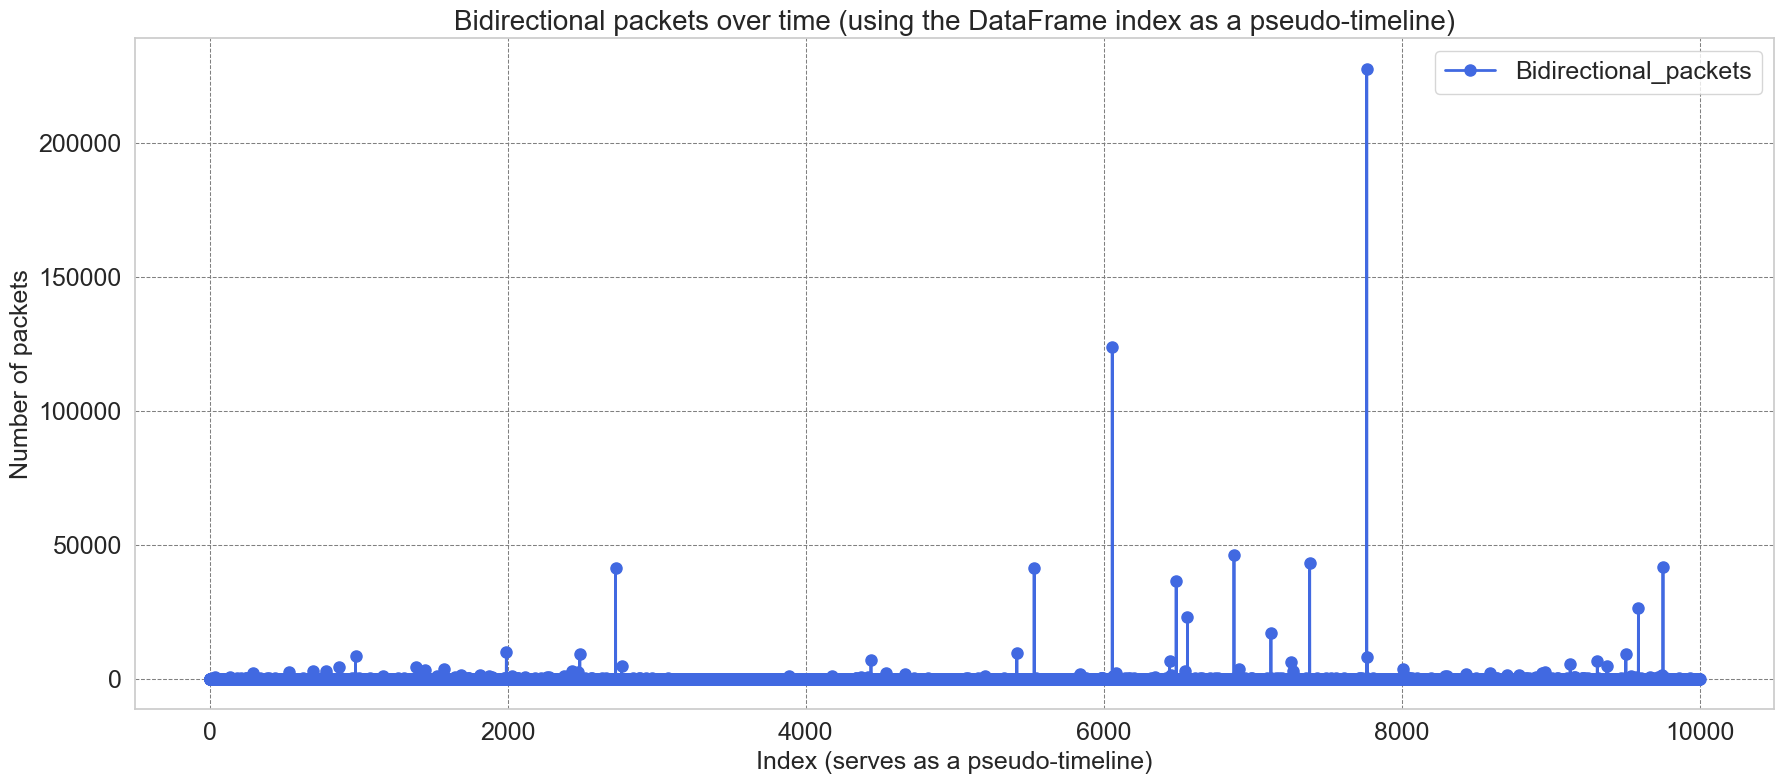

In [7]:
# Visualisation bidirection_packet in time
sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))

plt.plot(data.index, data['bidirectional_packets'], label='Bidirectional_packets', color='royalblue', alpha=1, marker='o', markersize=8, linewidth=2)

plt.title('Bidirectional packets over time (using the DataFrame index as a pseudo-timeline)', fontsize=20)

plt.xlabel('Index (serves as a pseudo-timeline)', fontsize=18)
plt.ylabel('Number of packets', fontsize=18)

plt.legend(fontsize=18)

plt.grid(True, which='major', linestyle='--', linewidth='0.75', color='gray')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()

plt.show()

As you can see from the graph, the bidirectional_packets attribute has several distinct peaks that could indicate anomalies or unusual network activity. These spikes could be the result of heavy communication or network attacks.

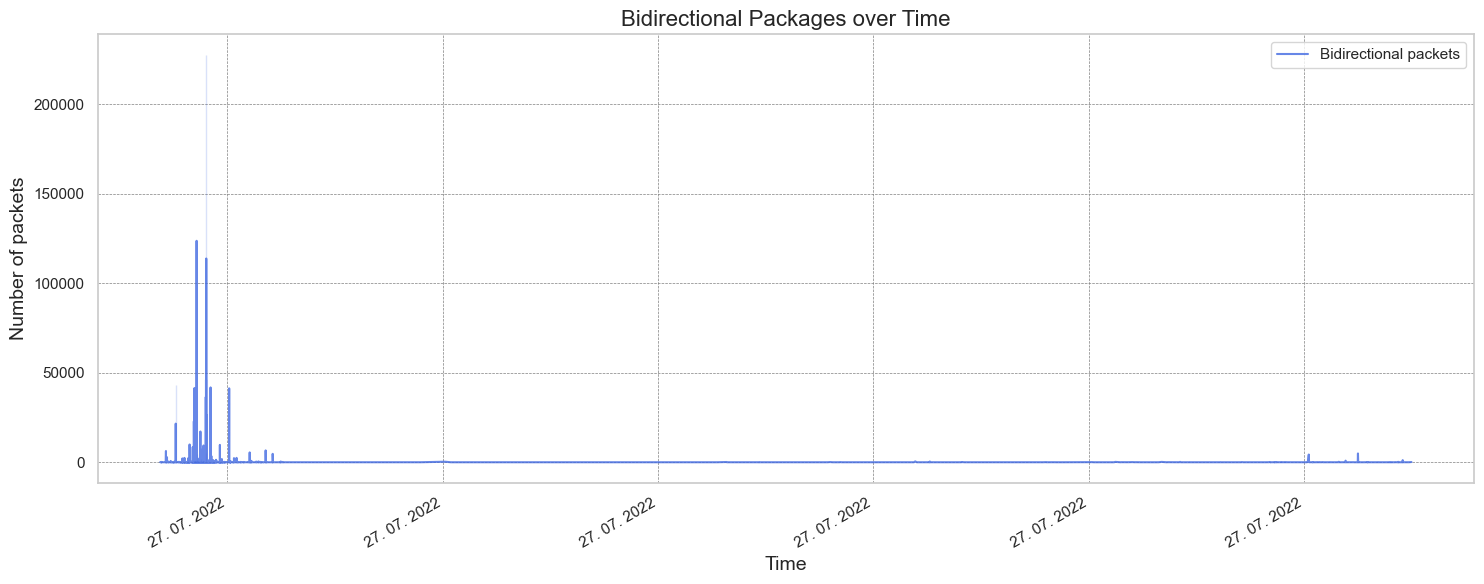

In [8]:
sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))

sns.lineplot(x='timestamp', y='bidirectional_packets', data=data, label='Bidirectional packets', color='royalblue', alpha=0.8)

plt.title('Bidirectional Packages over Time', fontsize=16)

plt.xlabel('Time', fontsize=14)
plt.ylabel('Number of packets', fontsize=14)

plt.legend()

plt.gcf().autofmt_xdate()
date_format = mpl_dates.DateFormatter('%d. %m. %Y')
plt.gca().xaxis.set_major_formatter(date_format)

plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

plt.tight_layout()

plt.show()

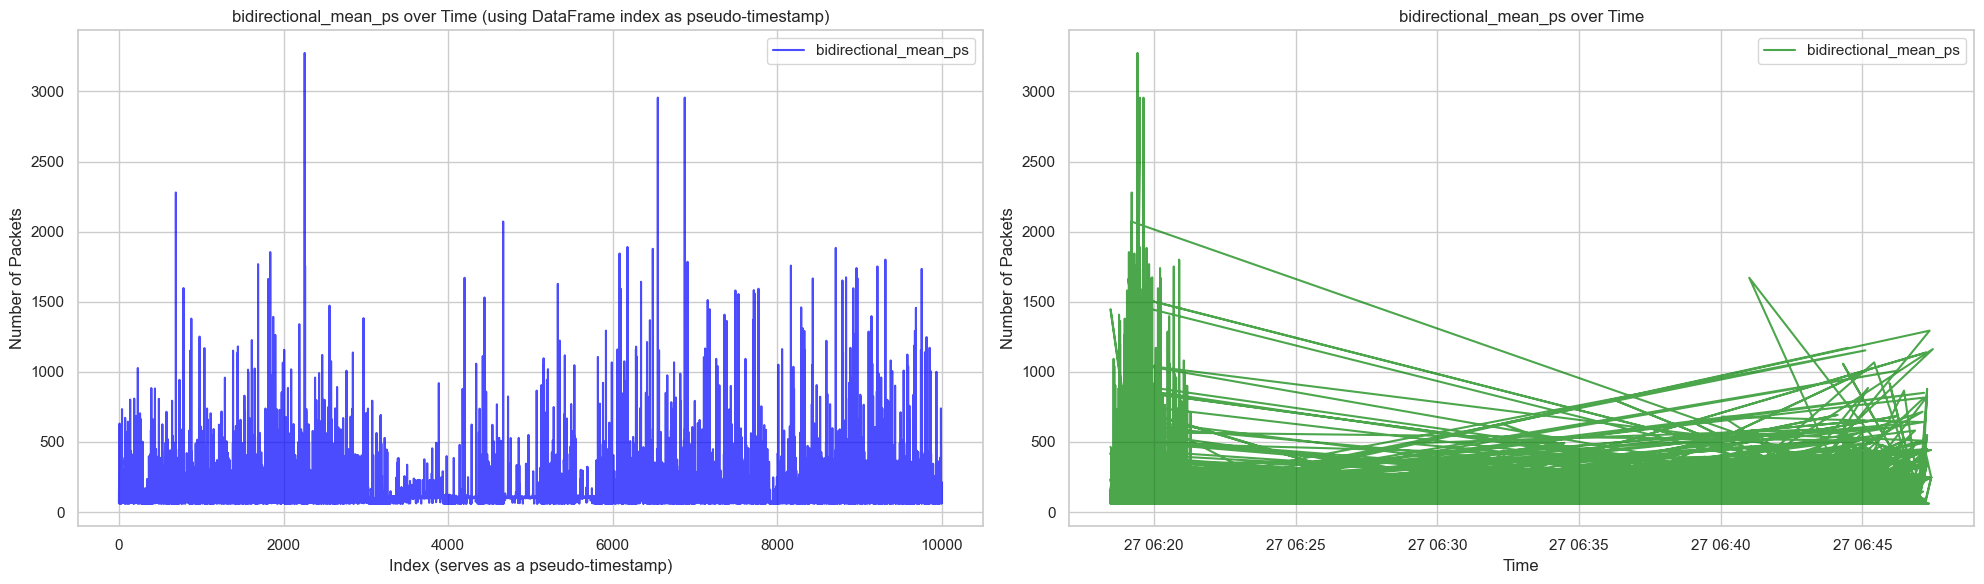

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# First visualization using DataFrame index as pseudo-timestamp
ax1.plot(data.index, data['bidirectional_mean_ps'], label='bidirectional_mean_ps', color='blue', alpha=0.7)
ax1.set_title('bidirectional_mean_ps over Time (using DataFrame index as pseudo-timestamp)')
ax1.set_xlabel('Index (serves as a pseudo-timestamp)')
ax1.set_ylabel('Number of Packets')
ax1.legend()
ax1.grid(True)

# Second visualization using the new timestamp column
ax2.plot(data['timestamp'], data['bidirectional_mean_ps'], label='bidirectional_mean_ps', color='green', alpha=0.7)
ax2.set_title('bidirectional_mean_ps over Time')
ax2.set_xlabel('Time')
ax2.set_ylabel('Number of Packets')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [12]:
# Basic statistics for bidirectional_packets
stats = data['bidirectional_packets'].describe()
stats

count     10000.000000
mean         98.689200
std        2829.092173
min           1.000000
25%           2.000000
50%           7.000000
75%          12.000000
max      227664.000000
Name: bidirectional_packets, dtype: float64

This is only a description of my sample, your values may differ

Average (mean): approximately 98.69 packets.
Standard deviation (std): Approximately 2829.09, indicating a large variability in the data.
Minimum value (min): 1 packet.
25th percentile (25%): 2 packets.
Median (50%): 7 packets.
75th percentile (75%): 12 packets.
Maximum value (max): 227,664 packets.

From these statistics, we see that most of the values are relatively low (median is 7), but there are also very high values (maximum value is 227,664), which may indicate the presence of anomalies or unusual network activity.

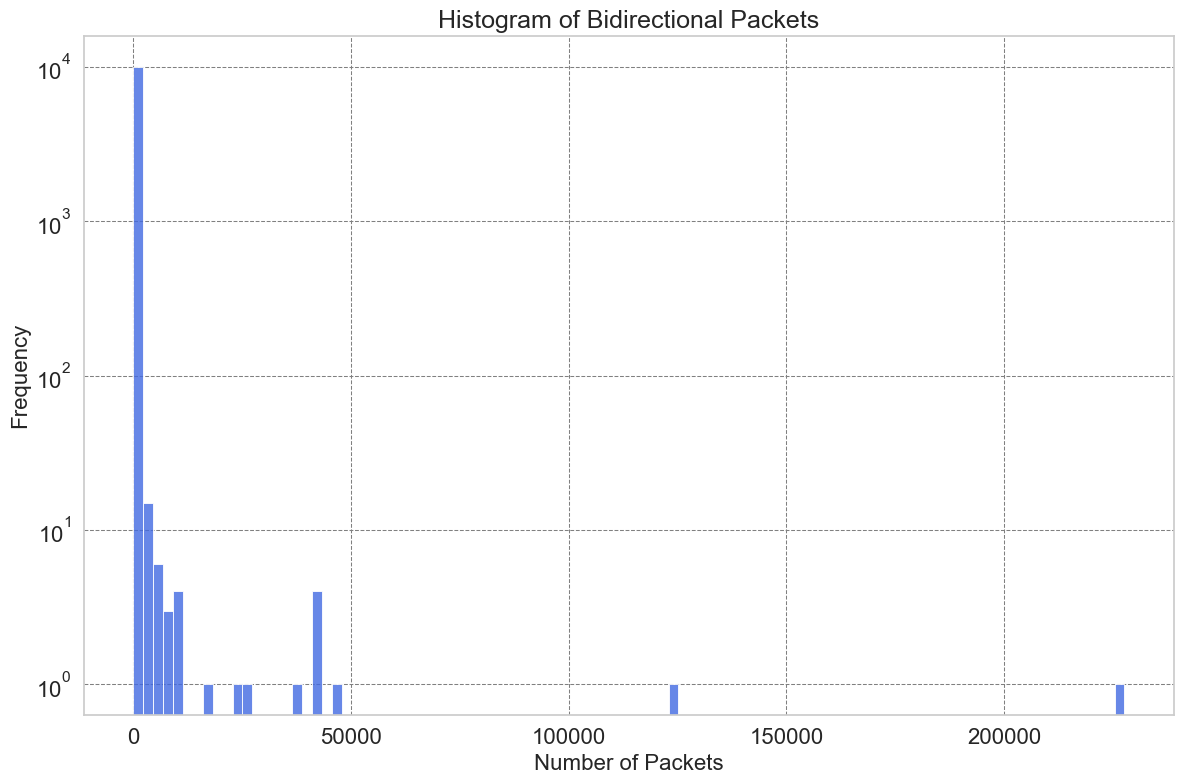

In [13]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))

sns.histplot(data['bidirectional_packets'], bins=100, color='royalblue', alpha=0.8)
plt.title('Histogram of Bidirectional Packets', fontsize=18)
plt.xlabel('Number of Packets', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.yscale('log')
plt.grid(True, which='major', linestyle='--', linewidth=0.75, color='grey')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.tight_layout()

plt.show()

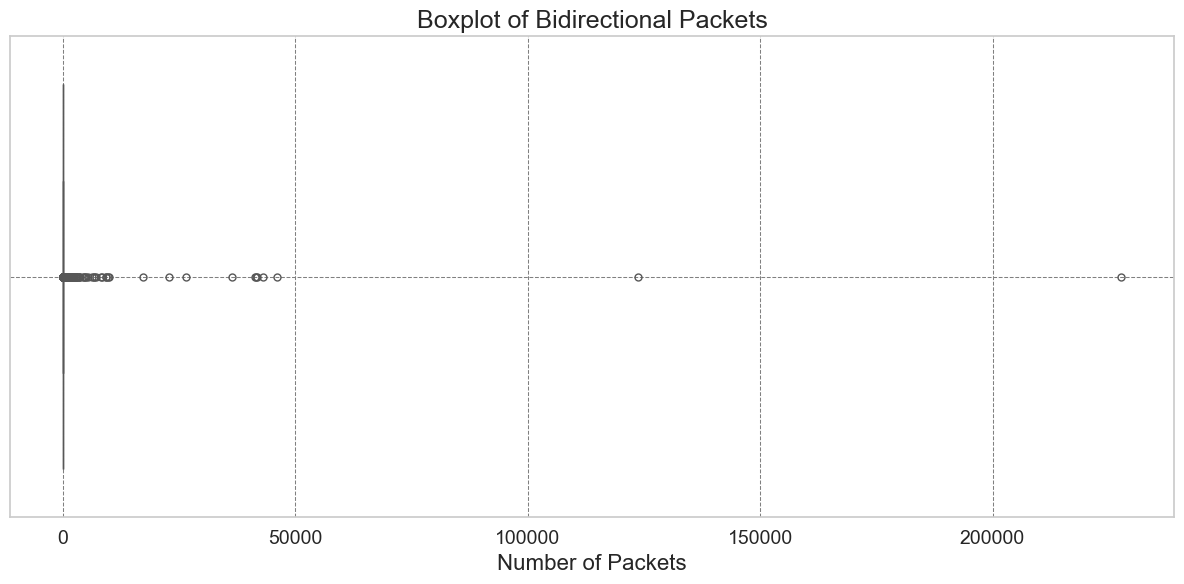

In [15]:
plt.figure(figsize=(12, 6))

sns.boxplot(x=data['bidirectional_packets'], orient='h', color='royalblue', fliersize=5)
plt.title('Boxplot of Bidirectional Packets', fontsize=18)
plt.xlabel('Number of Packets', fontsize=16)
plt.grid(True, which='major', linestyle='--', linewidth=0.75, color='grey')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.tight_layout()

plt.show()

Histogram: most of the values are clustered in the low ranges (which is consistent with the basic statistics we obtained earlier). High values, which represent potential anomalies, are rare but can be very high. We used a logarithmic scale on the y-axis to better visualize the data, as most values are clustered in the lower ranges.

Boxplot: most of the data (between the 25th and 75th percentile) are in the range of 2 to 12 packets. However, there are many outliers that are much higher than the upper whisker of the boxplot, indicating potential anomalies in the data.

In [17]:
# Column selection bidirectional_packets
packets_data = data[['bidirectional_packets']].values

# Data normalization
scaler = MinMaxScaler()
packets_normalized = scaler.fit_transform(packets_data)

# Splitting data into training and testing sets (70% training, 30% testing)
X_train, X_test = train_test_split(packets_normalized, test_size=0.3, random_state=42, shuffle=False)
X_train.shape, X_test.shape

((7000, 1), (3000, 1))

In [56]:
# Autoencoder architecture definition
input_layer = Input(shape=(1,))
encoded = Dense(8, activation='relu', activity_regularizer=l2(1e-5))(input_layer)
encoded = Dropout(0.1)(encoded)
encoded = Dense(4, activation='relu', activity_regularizer=l2(1e-5))(encoded)
encoded = Dropout(0.1)(encoded)
encoded = Dense(2, activation='relu', activity_regularizer=l2(1e-5))(encoded)

decoded = Dense(4, activation='relu')(encoded)
decoded = Dropout(0.1)(decoded)
decoded = Dense(8, activation='relu')(decoded)
decoded = Dropout(0.1)(decoded)
decoded = Dense(1, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)

# Model compilation
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Callback for early termination of training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Callback to reduce the learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6, verbose=1)

# Training the autoencoder
history = autoencoder.fit(
    X_train,
    X_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(X_test, X_test),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.2429 - val_loss: 0.2203 - learning_rate: 0.0010
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2121 - val_loss: 0.1831 - learning_rate: 0.0010
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1734 - val_loss: 0.1373 - learning_rate: 0.0010
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1281 - val_loss: 0.0898 - learning_rate: 0.0010
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0879 - val_loss: 0.0534 - learning_rate: 0.0010
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0632 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0488 - val_loss: 0.0232 - learning_rate: 0.0010
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0418 - val_loss: 0.0184 - learning_rate: 0.0010
Epoch 9/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0377 - val_loss: 0.0157 - learning_rate: 0.0010
Epoch 10/50
28/28 ━━━━━━━━━

In [57]:
autoencoder.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 8)              │            16 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 2)              │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 123 (492.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 248 (996.00 B)

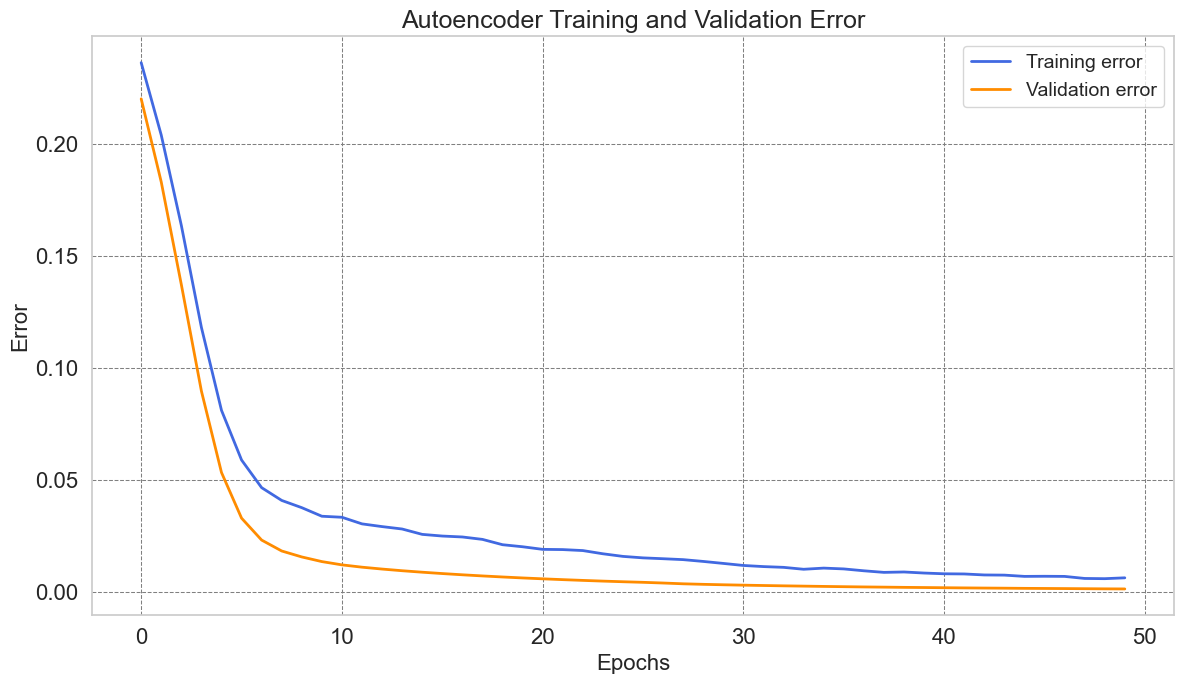

In [58]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 7))

sns.lineplot(data=history.history['loss'], label='Training error', color='royalblue', linewidth=2)
sns.lineplot(data=history.history['val_loss'], label='Validation error', color='darkorange', linewidth=2)

plt.title('Autoencoder Training and Validation Error', fontsize=18)
plt.xlabel('Epochs', fontsize=16)
plt.ylabel('Error', fontsize=16)

plt.legend(loc='upper right', frameon=True, framealpha=0.8, fontsize=14)

plt.grid(True, which='major', linestyle='--', linewidth='0.75', color='grey')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Setting axis limits, if required
# plt.ylim([0, max(max(history.history['loss']), max(history.history['val_loss'])) * 1.1])

plt.tight_layout()

plt.show()

In [59]:
# Test set prediction
X_test_pred = autoencoder.predict(X_test)

# Calculation of reconstruction error
reconstruction_error = np.mean(np.square(X_test_pred - X_test), axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [60]:
threshold = np.percentile(reconstruction_error, 95)
print("Threshold:", threshold)

Threshold: 0.00017055456973270964


In [61]:
anomalies = X_test[reconstruction_error > threshold]
print(f"Number of anomalies detected: {len(anomalies)}")


Number of anomalies detected: 9


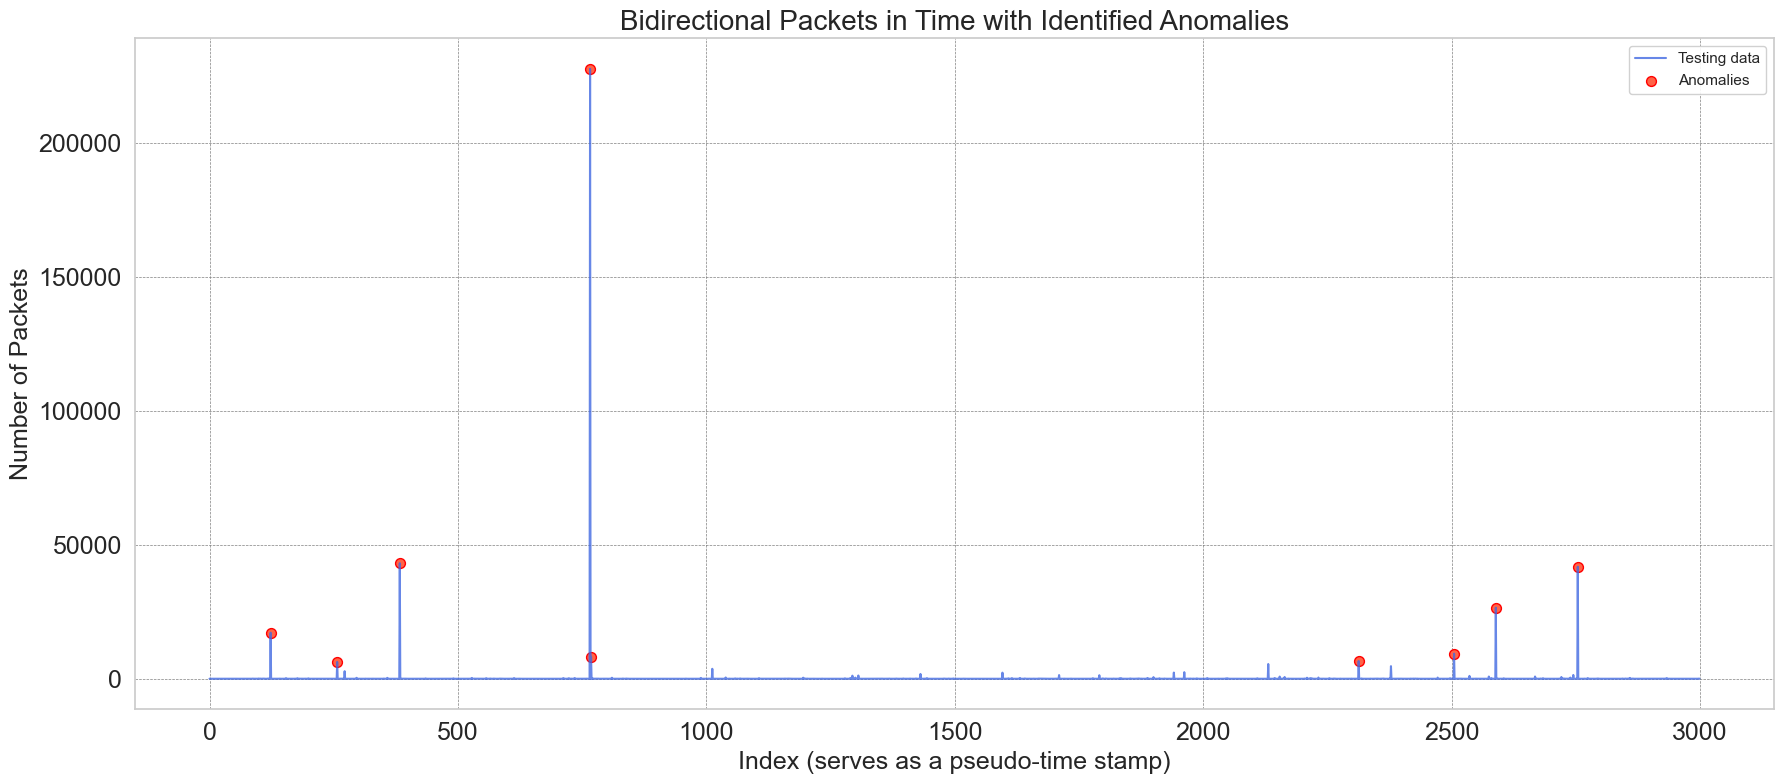

In [62]:
test_indices = np.arange(len(X_test))
anomalies_1 = reconstruction_error > threshold

anomaly_timestamps = test_indices[anomalies_1]
anomaly_values = X_test[anomalies_1]

sns.set(style="whitegrid")

plt.figure(figsize=(18, 8))

plt.plot(test_indices, scaler.inverse_transform(X_test), label='Testing data', color='royalblue', alpha=0.8)
plt.scatter(anomaly_timestamps, scaler.inverse_transform(anomaly_values), color='tomato', label='Anomalies', s=50, edgecolor='red')

plt.title('Bidirectional Packets in Time with Identified Anomalies', fontsize=20)
plt.xlabel('Index (serves as a pseudo-time stamp)', fontsize=18)
plt.ylabel('Number of Packets', fontsize=18)

plt.legend(loc='upper right', frameon=True, framealpha=0.9)

plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.tight_layout()

plt.show()

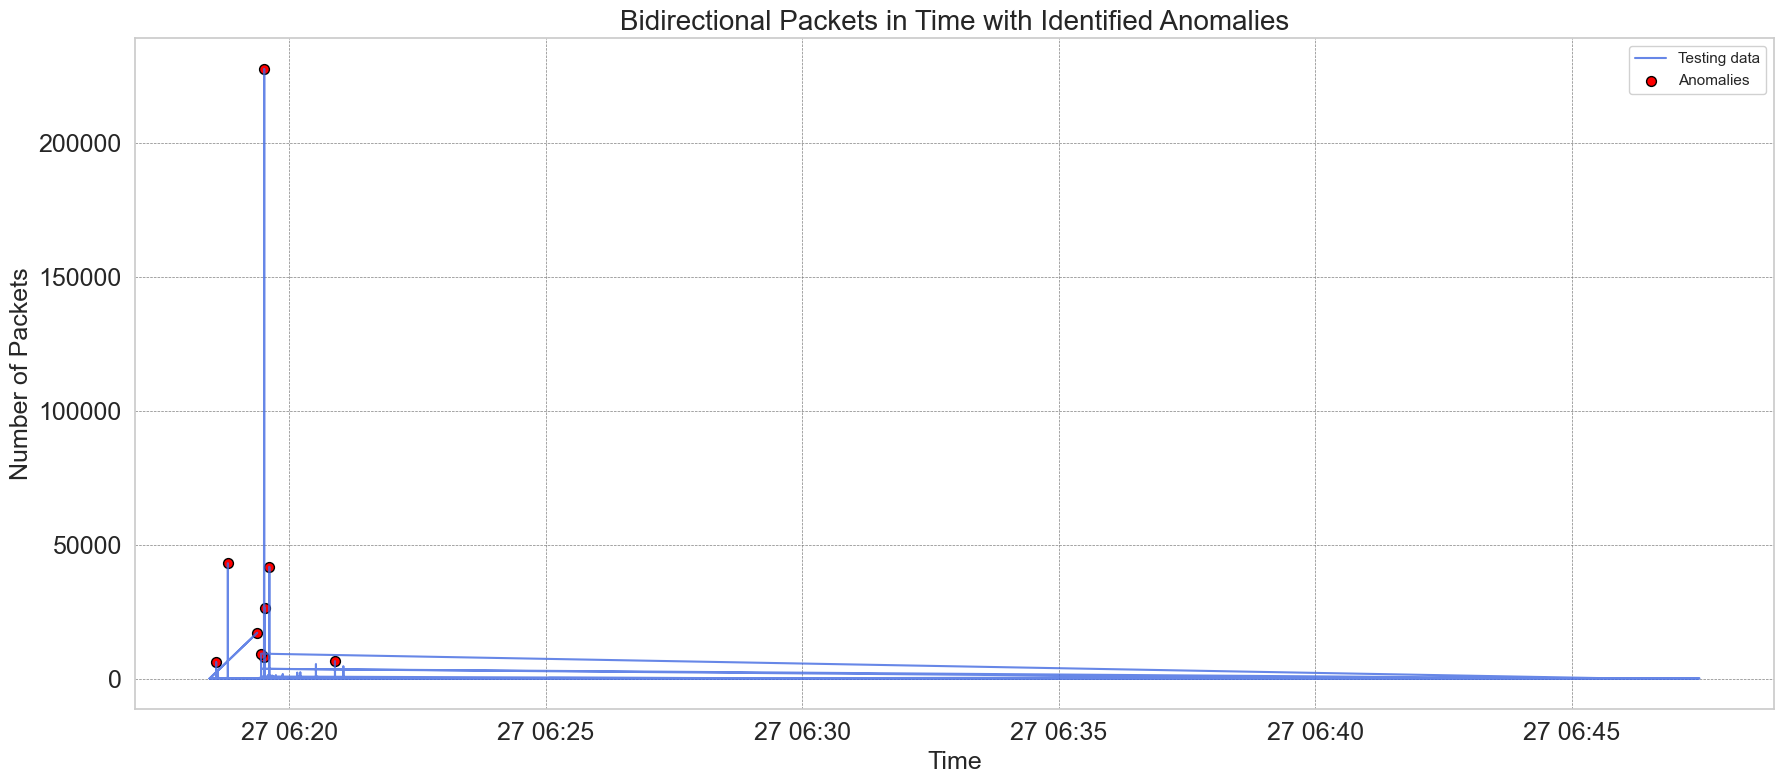

In [63]:
test_timestamps = data['timestamp'].iloc[len(X_train):]

anomaly_indices = np.where(reconstruction_error > threshold)[0]
anomaly_timestamps = test_timestamps.iloc[anomaly_indices]
anomaly_values = X_test[anomaly_indices]

plt.figure(figsize=(18, 8))
plt.plot(test_timestamps, scaler.inverse_transform(X_test), label='Testing data', color='royalblue', alpha=0.8)
plt.scatter(anomaly_timestamps, scaler.inverse_transform(anomaly_values), color='red', label='Anomalies', s=50, edgecolor='black')
plt.title('Bidirectional Packets in Time with Identified Anomalies', fontsize=20)
plt.xlabel('Time', fontsize=18)
plt.ylabel('Number of Packets', fontsize=18)
plt.legend(loc='upper right', frameon=True, framealpha=0.9)
plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.tight_layout()
plt.show()

In [64]:
# Creating a DataFrame with anomalies
anomalies_df = data.iloc[anomaly_indices + len(X_train)][['bidirectional_mean_ps']].copy()
anomalies_df['pseudo_timestamp'] = anomalies_df.index
print(anomalies_df)

      bidirectional_mean_ps  pseudo_timestamp
7123            1166.870444              7123
7257            1092.499124              7257
7383            1196.463889              7383
7766             919.909902              7766
7768            1330.093447              7768
9313            1800.174906              9313
9505             519.923143              9505
9589            1039.909550              9589
9754            1734.525787              9754


In [65]:
# Creating a DataFrame with anomalies
anomalies_df = data.iloc[anomaly_indices + len(X_train)][['timestamp', 'bidirectional_mean_ps']]
print(anomalies_df)

                   timestamp  bidirectional_mean_ps
7123 2022-07-27 06:19:22.591            1166.870444
7257 2022-07-27 06:18:34.604            1092.499124
7383 2022-07-27 06:18:48.215            1196.463889
7766 2022-07-27 06:19:30.748             919.909902
7768 2022-07-27 06:19:30.896            1330.093447
9313 2022-07-27 06:20:53.465            1800.174906
9505 2022-07-27 06:19:26.972             519.923143
9589 2022-07-27 06:19:31.168            1039.909550
9754 2022-07-27 06:19:36.735            1734.525787


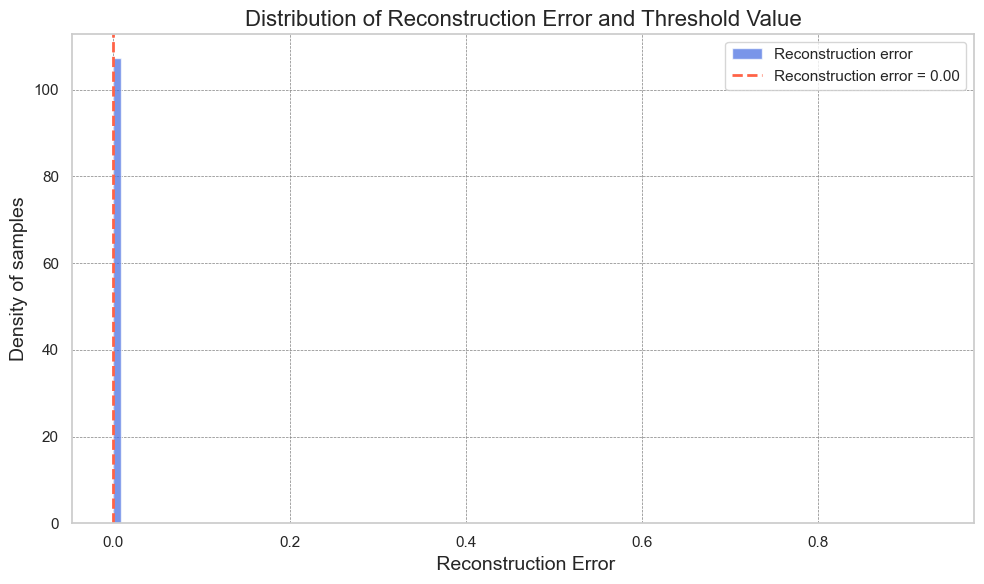

In [66]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

plt.hist(reconstruction_error, bins=100, alpha=0.7, label='Reconstruction error', color='royalblue', density=True)

plt.axvline(x=threshold, color='tomato', linestyle='dashed', linewidth=2, label=f'Reconstruction error = {threshold:.2f}')

plt.title('Distribution of Reconstruction Error and Threshold Value', fontsize=16)
plt.xlabel(' Reconstruction Error', fontsize=14)
plt.ylabel('Density of samples', fontsize=14)

plt.legend()

plt.grid(True, which='major', linestyle='--', linewidth='0.5', color='grey')

plt.tight_layout()

plt.show()

Histogram: Shows how many data points have a given error value. Most of the data points have a low error value, which means that the autoencoder has successfully reconstructed them.
Red dashed line: Indicates the threshold value you selected as the 95th percentile. All data points with an error above this value are considered anomalies.

In [73]:
# Calculate TP, FP, TN, FN based on the threshold of reconstruction error
TP = np.sum(reconstruction_error > threshold)
TN = len(reconstruction_error) - TP
FP = 0
FN = 0

confusion_matrix_df_actual = pd.DataFrame({
    'Actual Anomaly': [TP, FN],
    'Actual Normal': [FP, TN]
}, index=['Predicted Anomaly', 'Predicted Normal'])

confusion_matrix_df_actual

,Actual Anomaly,Actual Normal
Predicted Anomaly,9,0
Predicted Normal,0,2991
